In [ ]:
%%capture
! pip install emoji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk

import emoji
import re

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pd.set_option('display.max_colwidth', 1500)

# EDA

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


* Count Rows

In [ ]:
print("There is {} sentences".format(data.shape[0]))

There is 147725 sentences


* Check NaNs

In [ ]:
data.isna().sum()

id         0
text       0
dialect    0
dtype: int64

* Drop ID

In [ ]:
data.drop('id', axis=1, inplace=True)

* Check Duplicates

In [ ]:
data.duplicated().sum()

0

* View Label Distribution

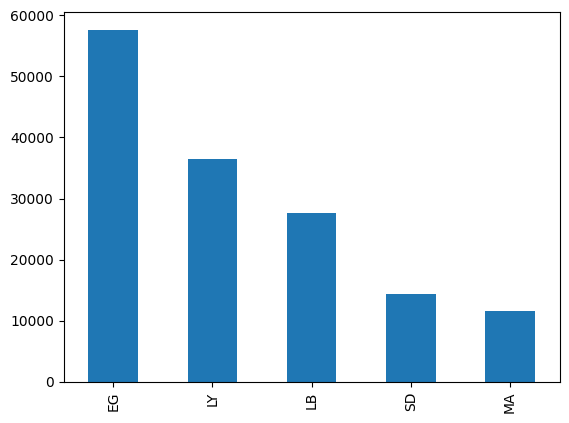

In [ ]:
data['dialect'].value_counts().plot(kind='bar')
plt.show()

* View a Sample of The Dataset

In [ ]:
data.sample(20)

,text,dialect
101717,اهو الفرصة جات لغاية عندكم ... تعالوا زوروا اسوان بقا 😅😊\n#visit_aswan https://t.co/RE3CXXxKH4,EG
72799,@Moelnagar11 وممكن تدهنابزيت لو مدخلتش يابن ال......,EG
127273,@Diaalaaaaaaaaaa ضلك قلن اييي و عمال البدك ياه💃🏼💃🏼,LB
127250,@MogHussein @JMklbhcfdtui انت شو دخلك؟😂\nما تحس كتير ما بيسوى,LB
5641,@bofajuve 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 تو في واحد زعلان علي وحده يقعد يقول فكووو طيري و يلحن فيها انا ضيقلي علمي الفيديو و الوهم اللي صاير,LY
23764,@aynoo95 تعيش وتلبس طاقية وين المشكلة!,LY
124783,@ferialjuhier @ay935 @saadhariri ماحدا منن بيستحي .مين قوى حزب الله وكان يدافع عنه ومنع تهمة الإرهاب عن الحزب غير الشهيد رفيق الحريري .من الاساس كان المفروض يقطعوا رأس الأفعى .بس ماكان عندهم بعد نظر,LB
95399,وعلى ايه على ايه هنبكى على الماضي\nايام وعدت ع الفاضي فى ايه هنبكى عليه,EG
81795,@amira07144149 صباح الحاجات الحلوة أميرة😘 و 'خدى ده عارفه يهمك😉😅👇\nhttps://t.co/vzx9o55ebq,EG
42851,@Pssktch متخفشي الوعي الحمد لله مبقاش فحال زمان . ربي يتبتنا على الحق هذا ما نقولو,MA


Problems detected with the texts:
* User Mentions
* URLs
* Hashtags
* Emojis
* English Words
* Stop Words
* Normalize Text
* Diacritics
* Repeated Characters
* Extra White Space
* Numbers

# Data Pre-processing

In [ ]:
def remove_user_mention(text):
  return re.sub('@[^\s]+', '', text)

In [ ]:
def remove_url(text):
  return re.sub('http\S+|www\S+', '', text)

In [ ]:
def remove_hashtag(text):
  return re.sub('#\w+', '', text)

In [ ]:
def remove_english_chars(text):
    english_chars_pattern = re.compile(r'[a-zA-Z]')
    cleaned_text = english_chars_pattern.sub('', text)
    return cleaned_text

In [ ]:
def normalize_text(text):
  text = re.sub('[ى]', 'ي', text)
  text = re.sub('[إأٱآا]', 'ا', text)
  text = re.sub('[ؤئ]', 'ء', text)
  text = re.sub('[ة]', 'ه', text)
  text = re.sub('گ', 'ك', text)
  text = re.sub(r'(.)\1+', r'\1', text) # remove repeated characters 'هههههه', 'جوول'
  return text

In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile('''
                 ّ    | # Tashdid
                 َ    | # Fatha
                 ً    | # Tanwin Fath
                 ُ    | # Damma
                 ٌ    | # Tanwin Damm
                 ِ    | # Kasra
                 ٍ    | # Tanwin Kasr
                 ْ    | # Sukun
                 ـ     # Tatwil/Kashida
             ''', re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

In [ ]:
def remove_arabic_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    
    tokens = text.split()
    
    tokens = [word for word in tokens if not word in stop_words]
    
    
    text = " ".join(tokens)
    
    return text

In [ ]:
def remove_numbers(text):
    """
    Removes arabic and english numbers from text
    """
    # Remove English numbers
    text = re.sub(r'[\d]', '', text)

    # Remove Arabic numbers
    text = re.sub('١|٠|٢|٣|٤|٥|٦|٧|٨|٩', '', text)
    return text

In [ ]:
import regex

def remove_emojis(text):
    # define a regex pattern to match all emojis
    emoji_pattern = regex.compile('[\p{Emoji}]')
    # substitute emojis with an empty string
    cleaned_text = emoji_pattern.sub("", text)
    return cleaned_text

In [ ]:
def remove_newlines_and_tabs(text):
    cleaned_text = text.replace('\n', '').replace('\t', '')
    return cleaned_text

In [ ]:
def remove_extra_spaces(text):
    words = text.split()
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
import string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
def pre_process_text(text):
  text = remove_user_mention(text)
  text = remove_url(text)
  text = remove_hashtag(text)
  text = remove_english_chars(text)
  text = normalize_text(text)
  text = remove_diacritics(text)
  text = remove_arabic_stopwords(text)
  text = remove_numbers(text)
  text = remove_emojis(text)
  text = remove_newlines_and_tabs(text)
  text = remove_punctuation(text)
  text = remove_extra_spaces(text)
  return text

In [ ]:
data_processed = data.copy()

In [ ]:
data_processed['text'] = data['text'].apply(pre_process_text)

In [ ]:
data_processed.sample(20)

,text,dialect
132484,ميشال سليمان عم يتفلسف ويحكي علي الي بالجامعه بنقولو حدا معبرك احسن الك خلي ارءك الخشبيه بخزانتك لانو انت ورايك الو قيمه,LB
119985,لحظه فايت شوفك اذا عاملها فولو,LB
98177,القانون يسري علي مستحق المعاش المستحق الاصلي اقراه كويس وبرضه معترض علي ده يعني ارمله بتاخد معاش جوزها ومش مكفي المعيشه والاولاد وحبت تشتغل خياطه مثلا علشان تساعد يتوقف المعاش حاجه مش ادميه اصلا,EG
93358,ده حاليا سينما ماحدش بيروحها,EG
38391,انا عمل ليها بلوك فينما يطلع ليا شي كونت ديالها نطيرو,MA
67894,دول حراميه سنين مني يخلصوا ازاي لازم تجيبي المنبع اولا,EG
183,متقوليليش جايه وايديك فاضيات,LY
70346,حاجات كتير الواحد مش قادر يكتبها ربنا حليم ستار,EG
31459,يحق لسكان الوادي يحق لغيرهم بعدين انت جماعه الارجاسنين ملام,LY
22422,الي بيشري عقارات اسطنبول ارخص طرابلس,LY


In [ ]:
# Encode 'dialect'
dialect_map = {
    'EG': 0,
    'LY': 1,
    'LB': 2,
    'SD': 3,
    'MA': 4
}
data_processed['dialect'] = data_processed['dialect'].replace(dialect_map)

In [ ]:
data_processed.to_csv('data_processed.csv', index=False)